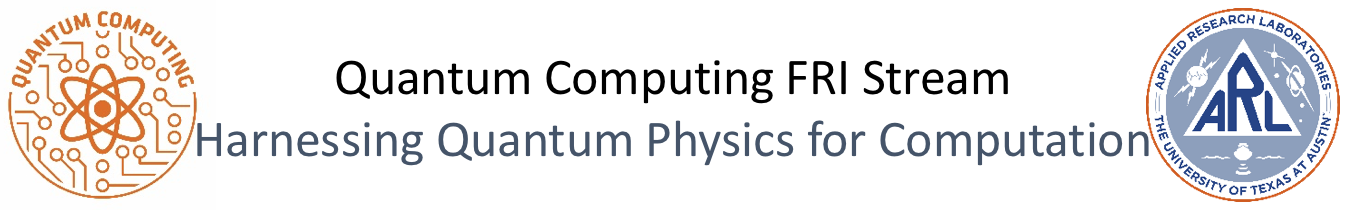

#### Most Recent Lesson: Lesson02 - Intro to Qiskit

## Installations and Imports

In [1]:
%pip install qiskit
%pip install qiskit-aer

#You may need to restart the runtime for this change to take effect
%pip install pylatexenc

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install qiskit_ibm_runtime

Note: you may need to restart the kernel to use updated packages.


In [3]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import Aer
from qiskit.primitives import Sampler, StatevectorSampler, Estimator, StatevectorEstimator
import numpy as np

sampler = StatevectorSampler()


In [4]:
from qiskit.visualization import plot_histogram

In [5]:
from qiskit_ibm_runtime import SamplerV2 as Sampler

## <font color=green> HW Part 1 - Quantum Teleportation, kind of </font>

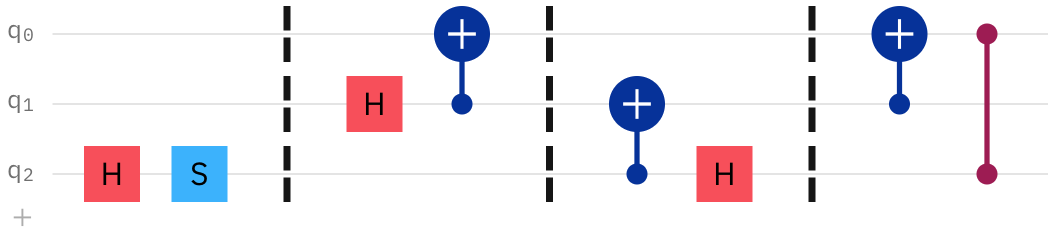

1. Use Qiskit to implement the teleportation protocol shown above.
2. Verify that q[2] was correctly sent to q[0].  (How?)
3. __Interpret your results__.

4. Prepare a random qubit state using u(theta, phi, lambda) and teleport that state.

(__Note__: “lambda” is a reserved word in Python – don’t use it as a variable!)

Fontconfig warning: ignoring UTF-8: not a valid region tag
Matplotlib is building the font cache; this may take a moment.


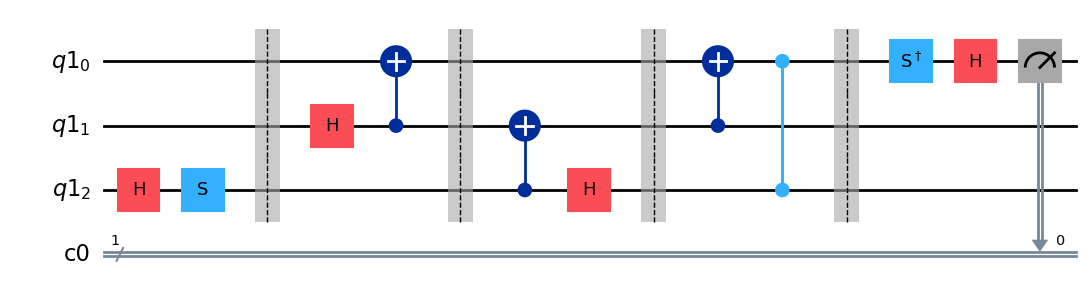

In [6]:
q = QuantumRegister(3)  #3 qubits
c = ClassicalRegister(1) #only need one classical bit
qc = QuantumCircuit(q,c) #combine q and c into a quantum circuit

#First, initialize the state we want to teleport
qc.h(q[2])
qc.s(q[2])
qc.barrier(q)


#Then, initialize the Bell pair we will use as a resource
qc.h(q[1])
qc.cx(q[1],q[0])
qc.barrier(q)

#Now, we perform the correlating part of the Bell State Measurement
qc.cx(q[2],q[1])
qc.h(q[2])
qc.barrier(q)

#In place of measuring and then doing conditional gates, make the corrections controlled on q1 and q2!
qc.cx(q[1],q[0])
qc.cz(q[2],q[0])
qc.barrier(q)


#Finally, measure in the appropriate basis
qc.sdg(q[0])
qc.h(q[0])
qc.measure(q[0],c)

qc.draw('mpl')

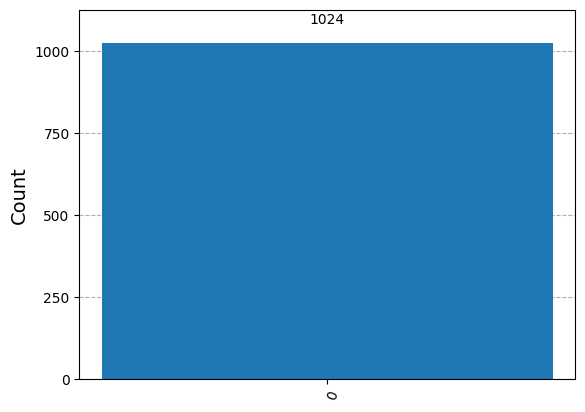

In [8]:
backend = Aer.get_backend('qasm_simulator') #tell it where to simulate

job = transpile(qc, backend)
results = sampler.run([qc]).result()
data_pub = results[0].data
counts = data_pub.c0.get_counts()

#counts=execute(qc, backend, shots=1024).result().get_counts(qc)

plot_histogram(counts)

The all 0s confirms that we were successfully able to "teleport" q2 to q0. Remember, we are really just destroying q2 and recreating it in q0. This is true for n qubits also.

## <font color=green> HW Part 2 - More Challenge! </font>

Create a Python script that teleports a multi-qubit quantum state.

A basic outline of the steps is given below.

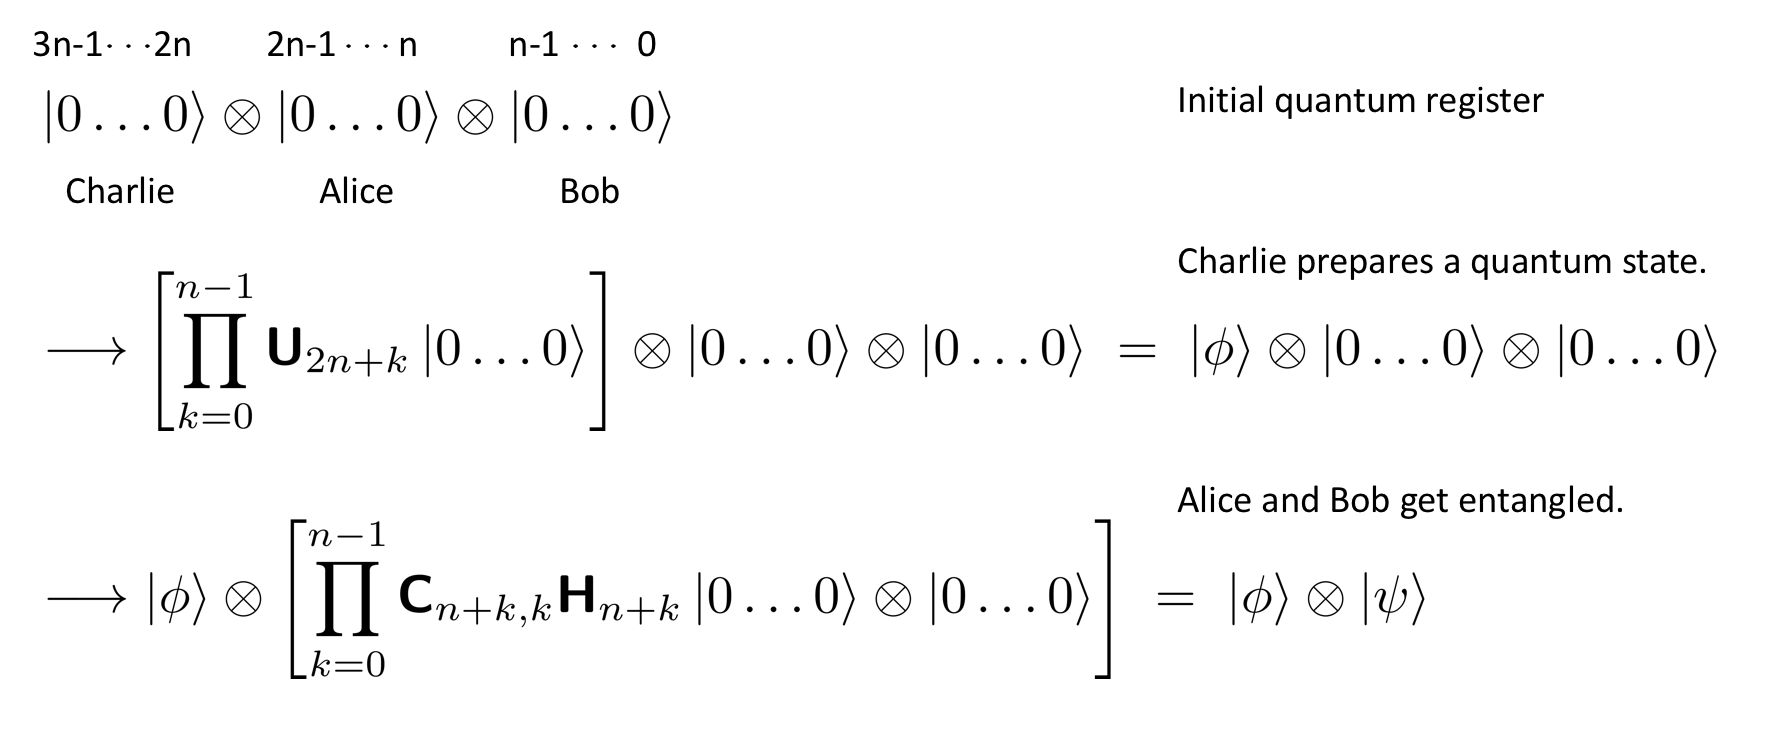

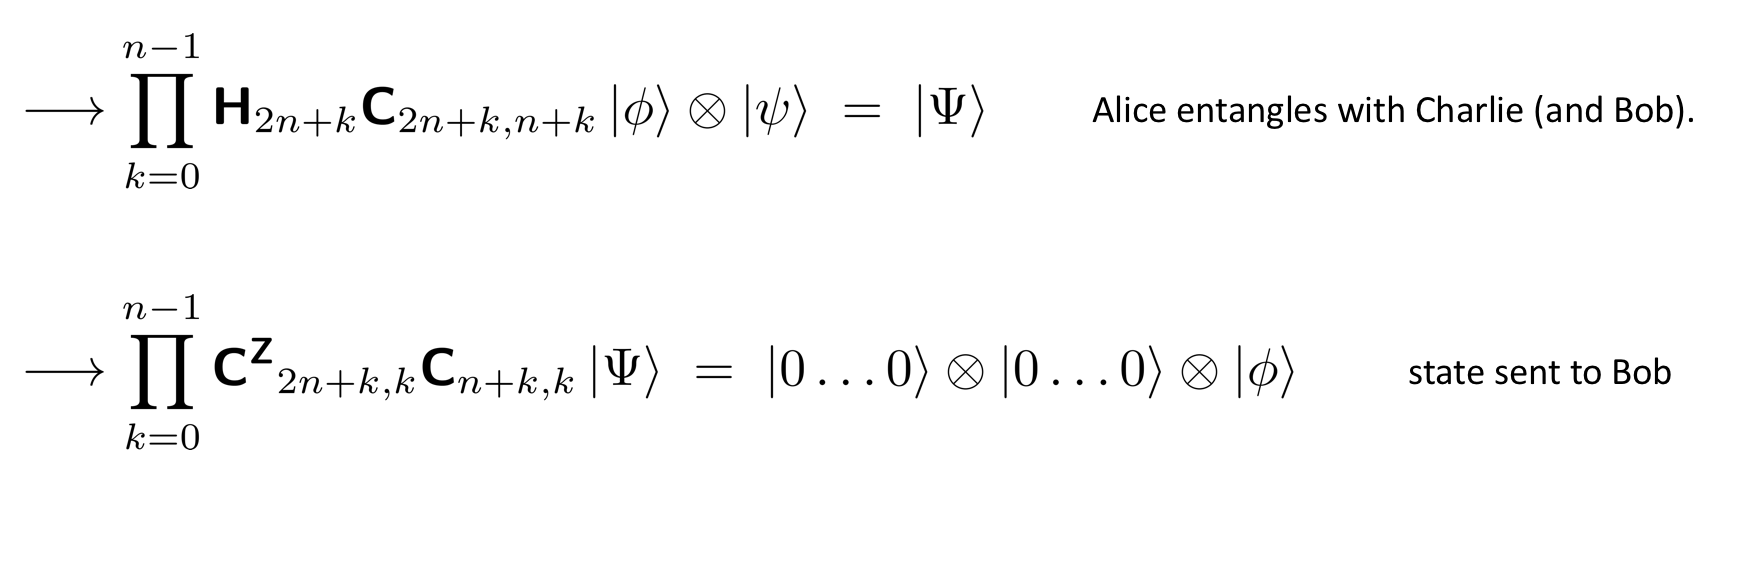

You may find it easier to implement this for a fixed number of qubits per party (for example 2 each, then 3 each) before going to the n-qubit case.

In [ ]:
import math as np

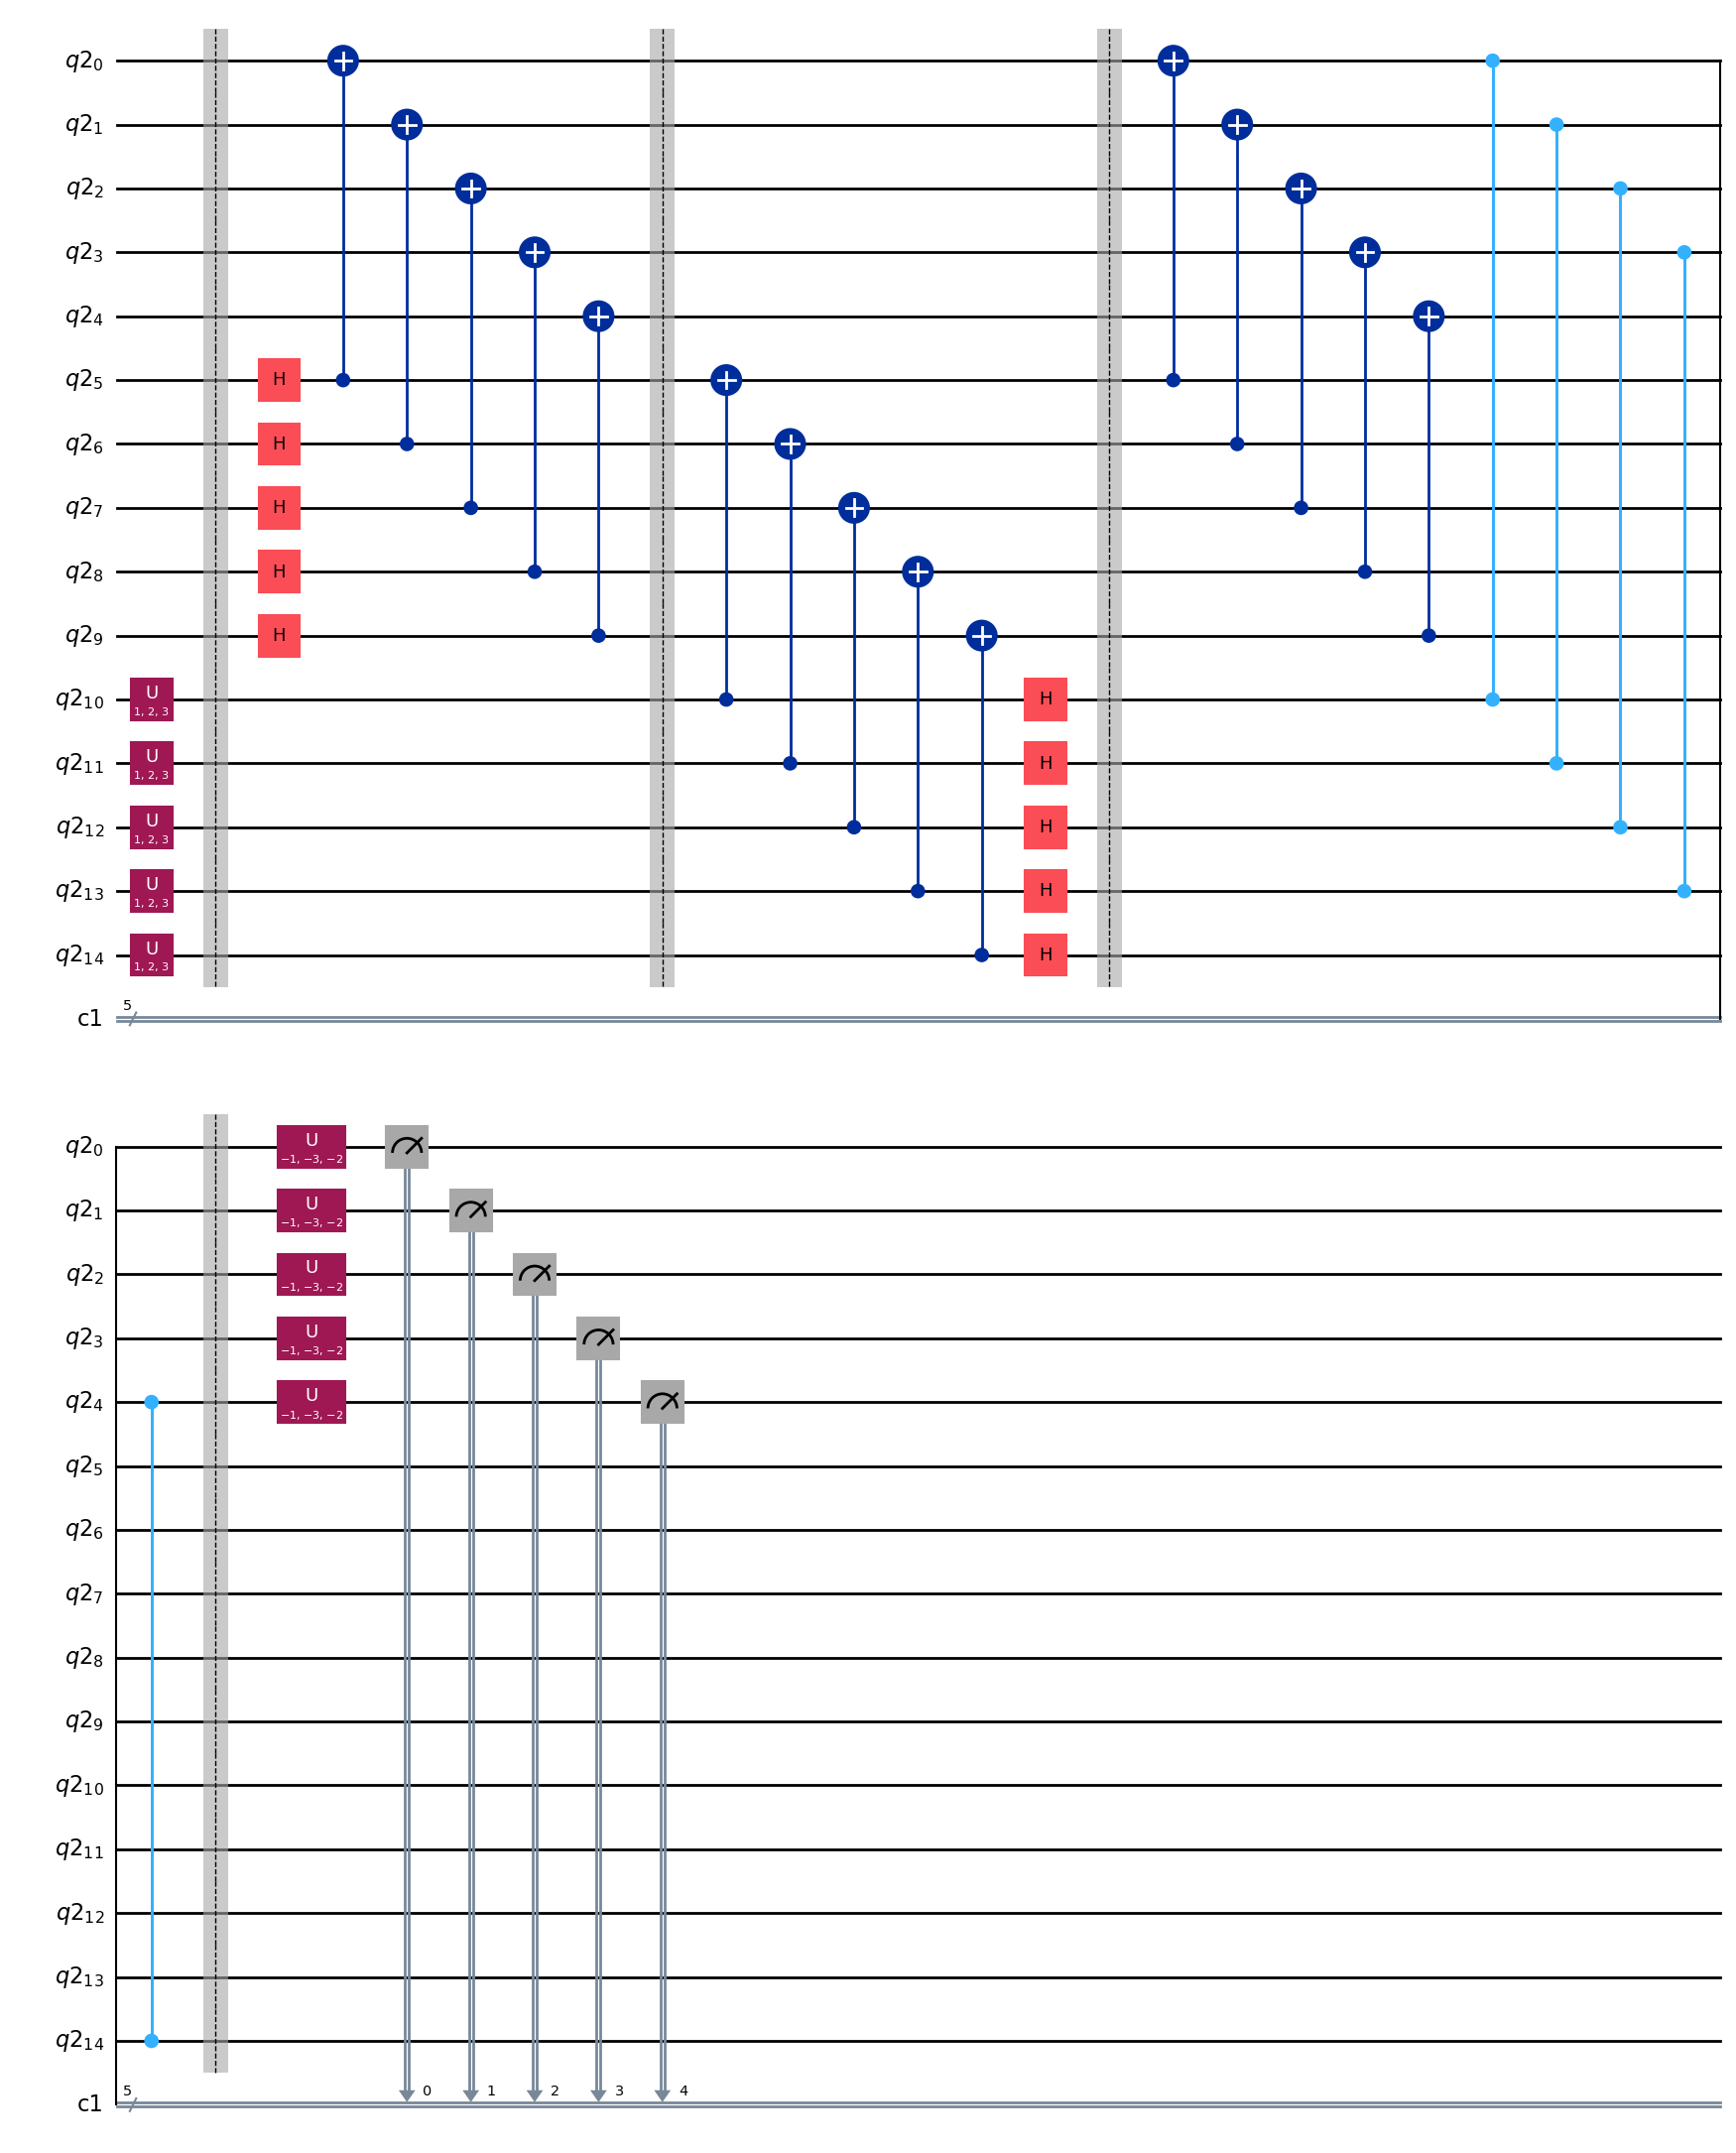

In [9]:
n = 5
thet, phi, lam = 1, 2, 3
q = QuantumRegister(3*n)
c = ClassicalRegister(n)
qc = QuantumCircuit(q,c)

#########

#First, initialize the state we want to teleport
for i in range(n):
  qc.u(thet, phi, lam, q[2*n + i])
qc.barrier(q)


#Then, initialize the Bell pair we will use as a resource
for i in range(n):
  qc.h(q[n + i])
  qc.cx(q[n + i],q[i])
qc.barrier(q)

#Now, we perform the correlating part of the Bell State Measurement
for i in range(n):
  qc.cx(q[2*n + i],q[n + i])
  qc.h(q[2*n + i])
qc.barrier(q)

#In place of measuring and then doing conditional gates, make the corrections controlled on q1 and q2!
for i in range(n):
  qc.cx(q[n + i],q[i])
  qc.cz(q[2*n + i],q[i])
qc.barrier(q)


#Finally, measure in the appropriate basis
for i in range(n):
  #qc.u(thet, -np.pi - lam, -(np.pi + phi), q[i])
  qc.u(-thet, -lam, -phi, q[i])
  qc.measure(q[i], i)

#########

qc.draw('mpl')

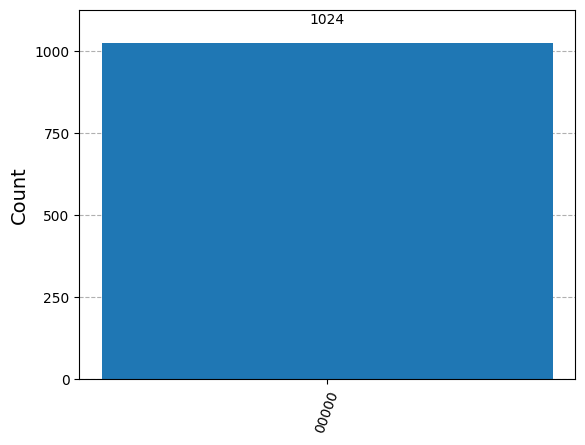

In [11]:
backend = Aer.get_backend('qasm_simulator') #tell it where to simulate

job = transpile(qc, backend)
results = sampler.run([qc]).result()
data_pub = results[0].data
counts = data_pub.c1.get_counts()

#counts=execute(qc, backend, shots=1024).result().get_counts(qc)

plot_histogram(counts)